Loading libraries

In [6]:
%matplotlib inline
from load_covid_data import load_covid_data
import numpy as np
from sklearn.neural_network import MLPClassifier
from accuracy_score import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings

Loading covid dataset and splitting in train / test

In [7]:

# Loading covid dataset
headers, X, Y = load_covid_data()

X = X[: 100000, :] 
Y = Y[: 100000] 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

Training model

In [8]:

layers = [12,10,8]
classifier = MLPClassifier(solver="adam", hidden_layer_sizes=layers, random_state=1, activation="relu")
classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=[12, 10, 8], random_state=1)

Testing model with a prediction

In [9]:
y_pred = classifier.predict(X_test)
print(accuracy_score(y_pred, y_test))

[[10175   725]
 [ 1626  7474]]
0.88245


Plotting accuracy score over epoch

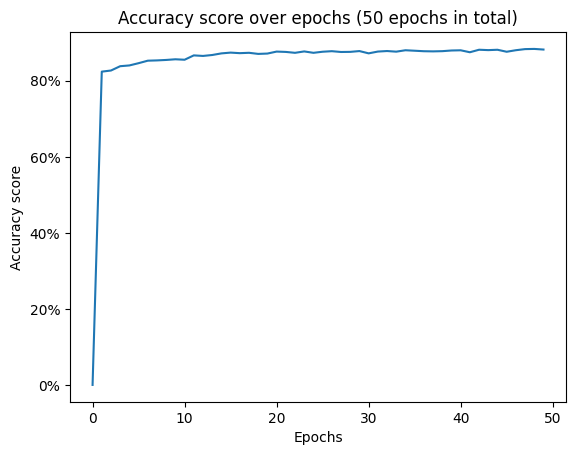

In [10]:
# Ignoring convergence warning for not bloating the output
warnings.filterwarnings("ignore", category=ConvergenceWarning)
max_epochs = 50

predictions = np.zeros(max_epochs)

for i in range(1, max_epochs):
    classifier = MLPClassifier(solver="adam", hidden_layer_sizes=layers, random_state=1, activation="relu", max_iter= i)
    classifier.fit(X_train, y_train)
    predictions[i] = accuracy_score(classifier.predict(X_test), y_test, conf = False)

plt.figure()
plt.plot(predictions * 100)
plt.xlabel("Epochs")
plt.ylabel("Accuracy score")
plt.title(f"Accuracy score over epochs ({max_epochs} epochs in total)")
plt.savefig("../figures/accuracy_over_epochs_mlp")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()